In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


In [2]:
df=pd.read_csv("/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00



**#Visualizations: Churn analysis against gender**


In [8]:
df.groupby('gender')['churn'].count()

gender
Female    4543
Male      5457
Name: churn, dtype: int64

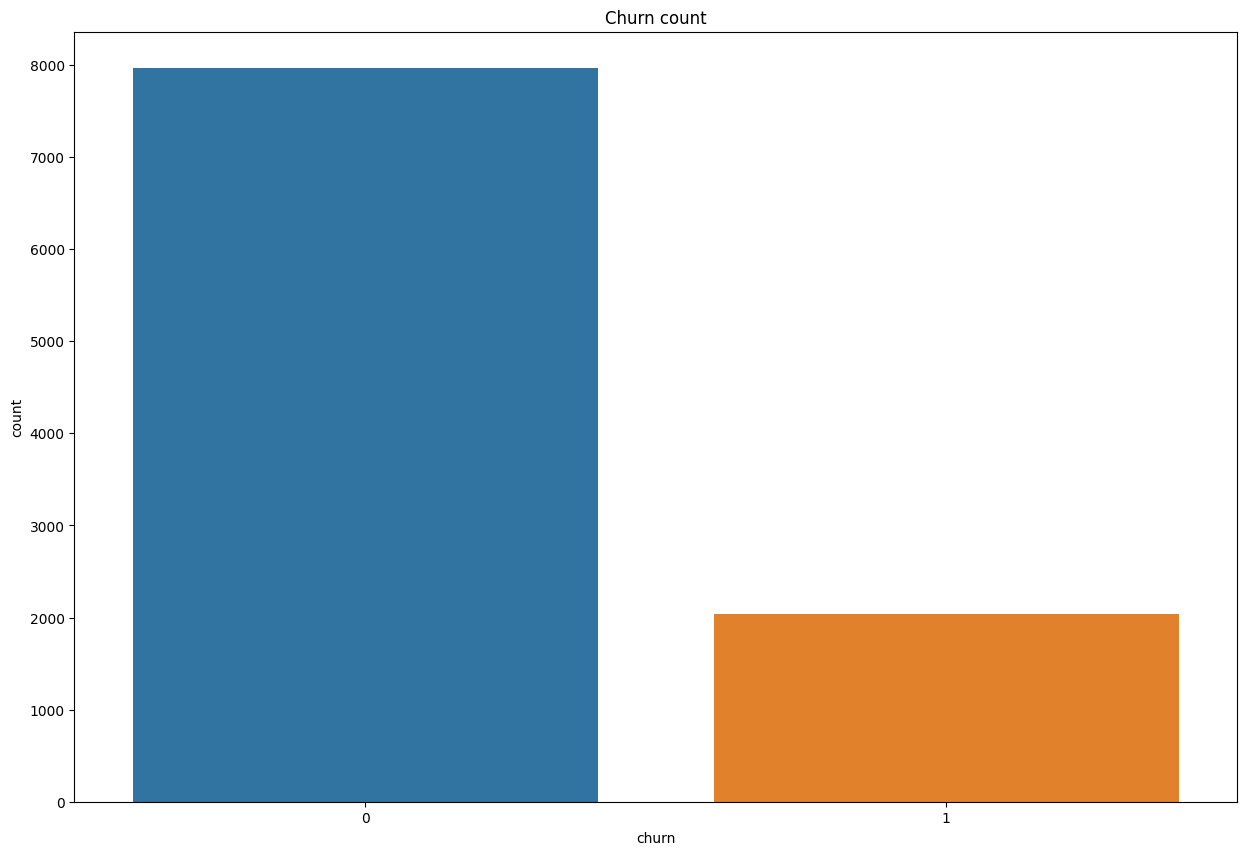

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='churn')

plt.title('Churn count')
plt.show()

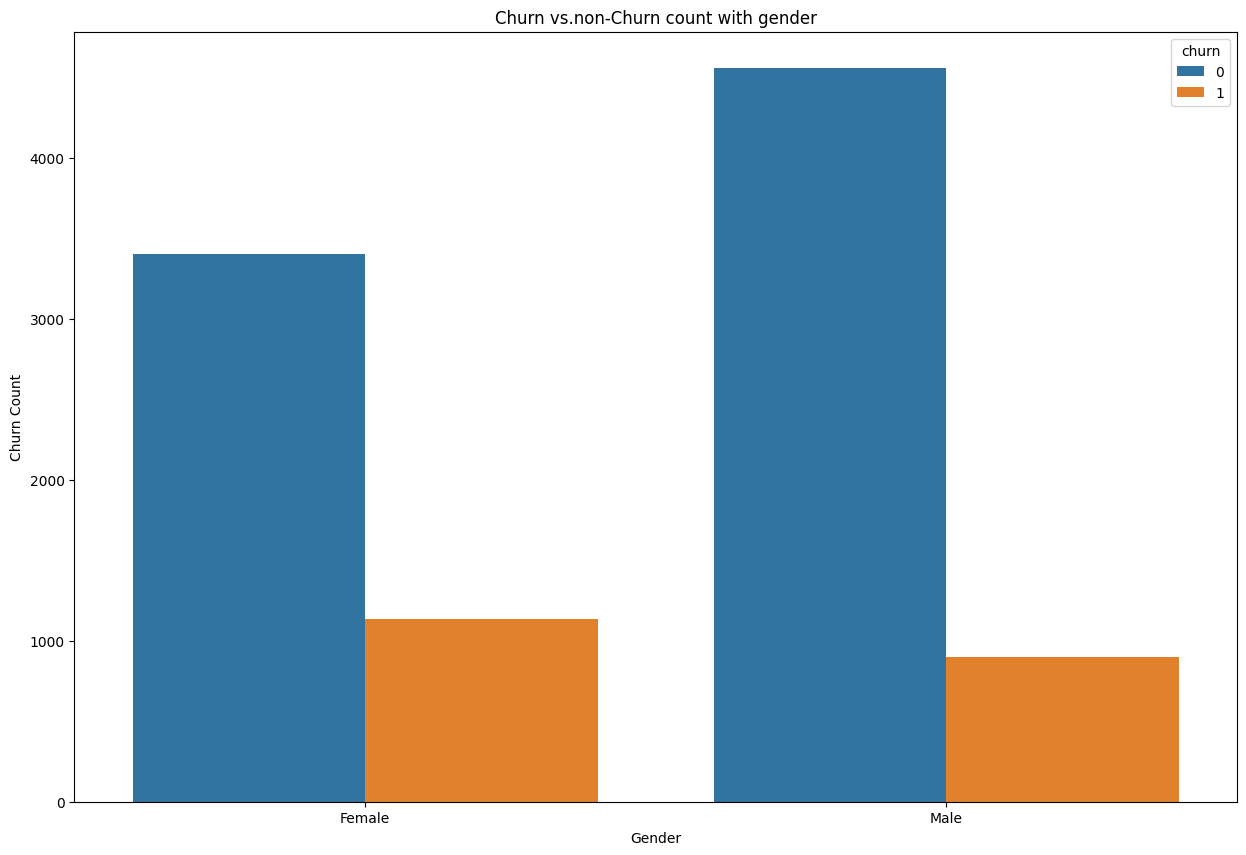

In [10]:
plt.figure(figsize=(15,10))
sns.countplot(df, x='gender', hue='churn' )
plt.xlabel('Gender')
plt.ylabel('Churn Count')
plt.title('Churn vs.non-Churn count with gender')
plt.show()


Observation:
The number of churned customers is significantly higher among females compared to males. This suggests that female customers may be more likely to discontinue service or are experiencing factors leading to higher churn rates. Further analysis may be needed to understand the underlying reasons for this trend.

**Churn Count at different age**


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

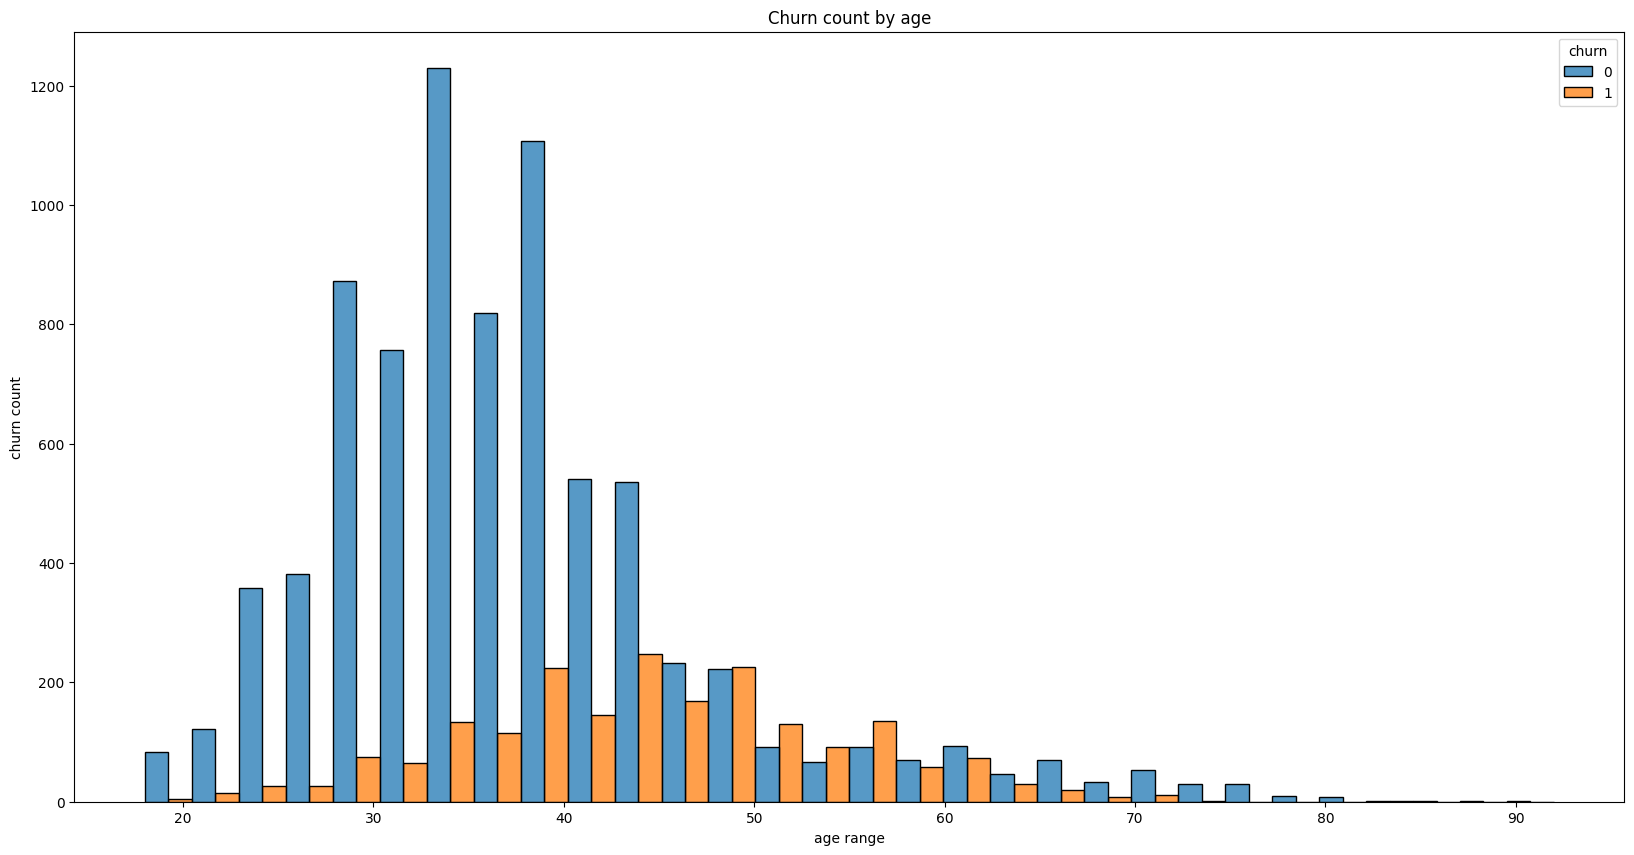

In [11]:
plt.figure(figsize=(20,10))
sns.histplot(df, x='age', hue='churn', multiple='dodge', bins=30)
plt.xlabel('age range')
plt.ylabel('churn count')
plt.title('Churn count by age')
plt.show()

Observation:
Churn rates are noticeably higher among individuals in the 35 to 55 age range, with the peak churn count occurring between ages 40 and 50. This indicates that middle-aged customers are more likely to churn compared to both younger and older age groups. This trend may point to specific needs or challenges faced by this demographic that warrant further investigation.

**Churn count in different country**

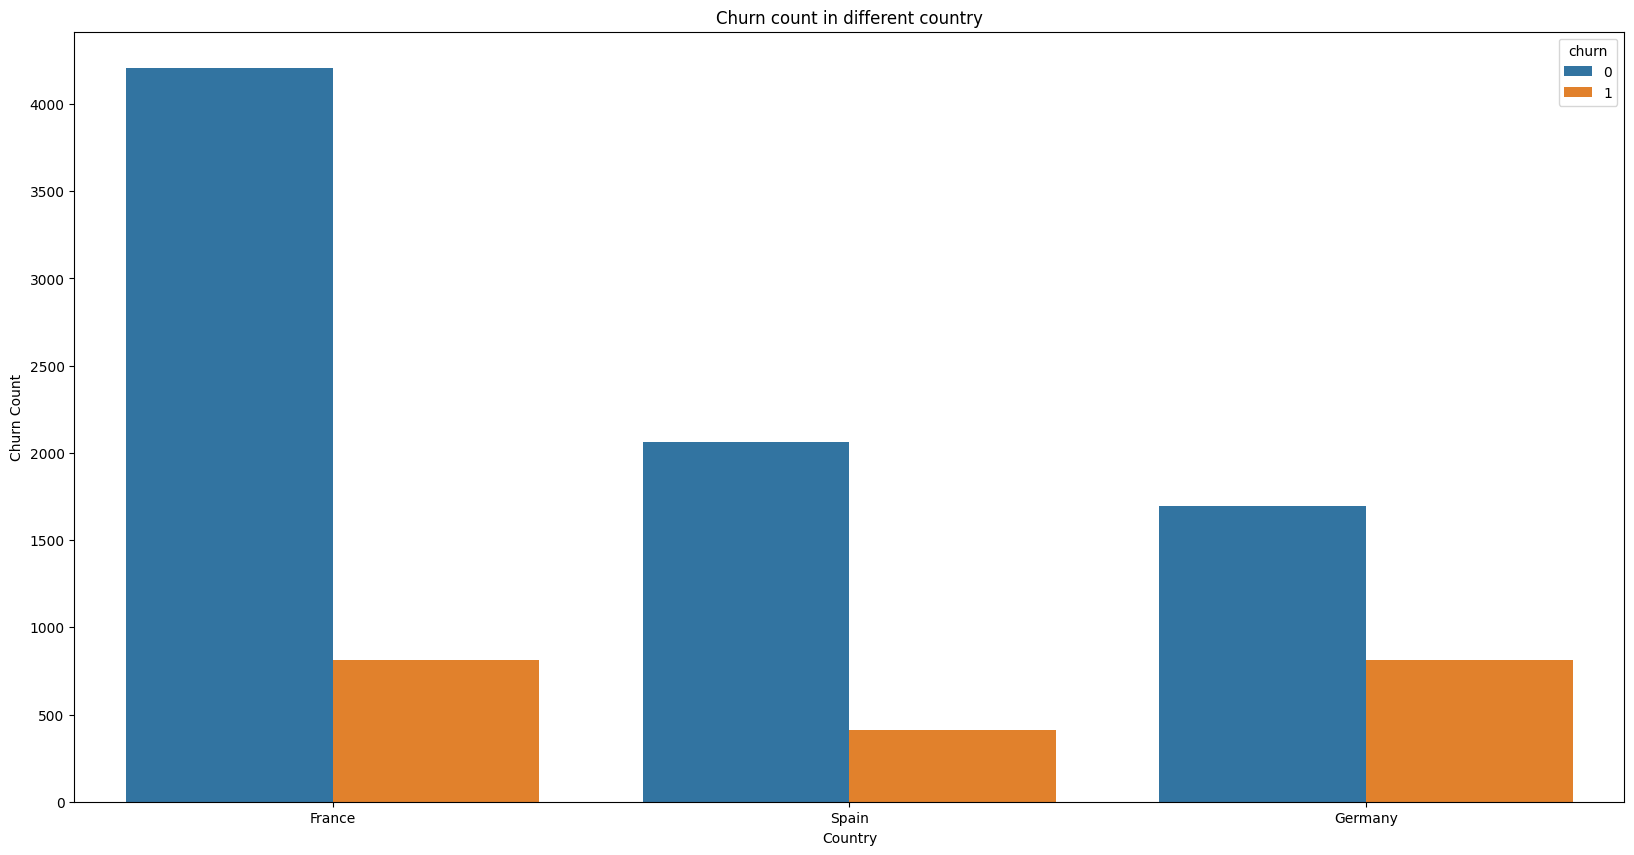

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(df, x='country', hue='churn')
plt.xlabel('Country')
plt.ylabel('Churn Count')
plt.title('Churn count in different country')
plt.show()


Observation:
Among the three countries—Spain, Germany, and France—Germany shows a significantly higher churn count relative to its total customer base. This suggests that customer retention is a particular challenge in the German market and may require targeted strategies to address the underlying causes.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

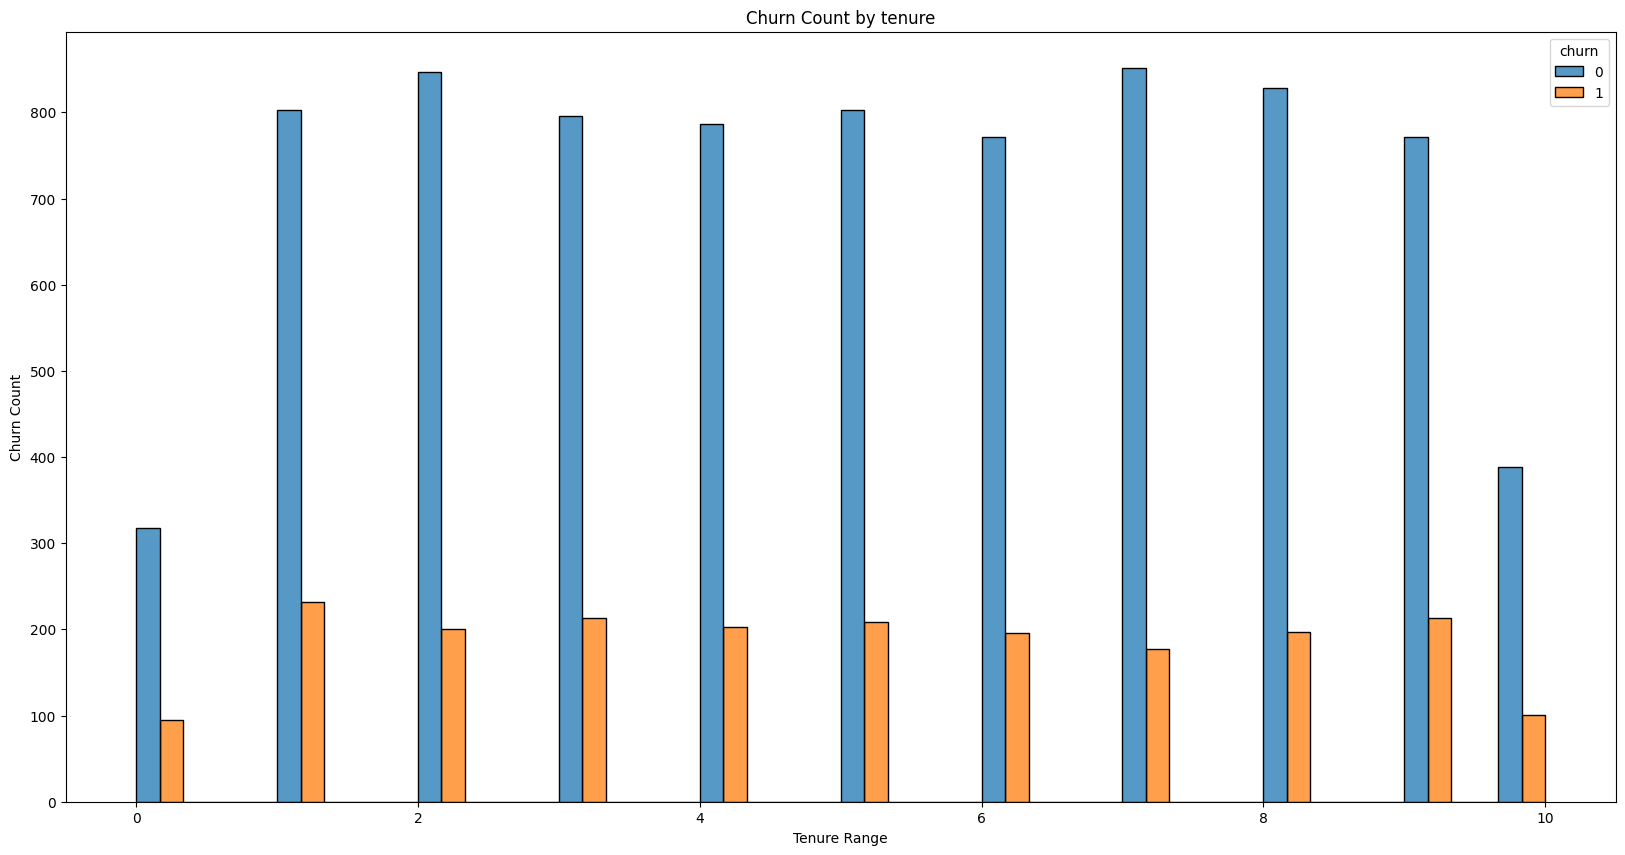

In [13]:
plt.figure(figsize=(20,10))
sns.histplot(df, x='tenure', hue='churn', multiple='dodge', bins=30)
plt.xlabel('Tenure Range')
plt.ylabel('Churn Count')
plt.title('Churn Count by tenure')
plt.show()


Observation:
Churn rates are notably lower at the extremes of tenure—particularly for customers who are new (tenure close to 0) and those who have been with the company for a long time (tenure around 10). In contrast, customers with mid-range tenure tend to exhibit consistently higher churn rates, suggesting that the risk of churn increases after the initial onboarding period and stabilizes only after long-term loyalty is established.

**Churn Count having credit card or not**

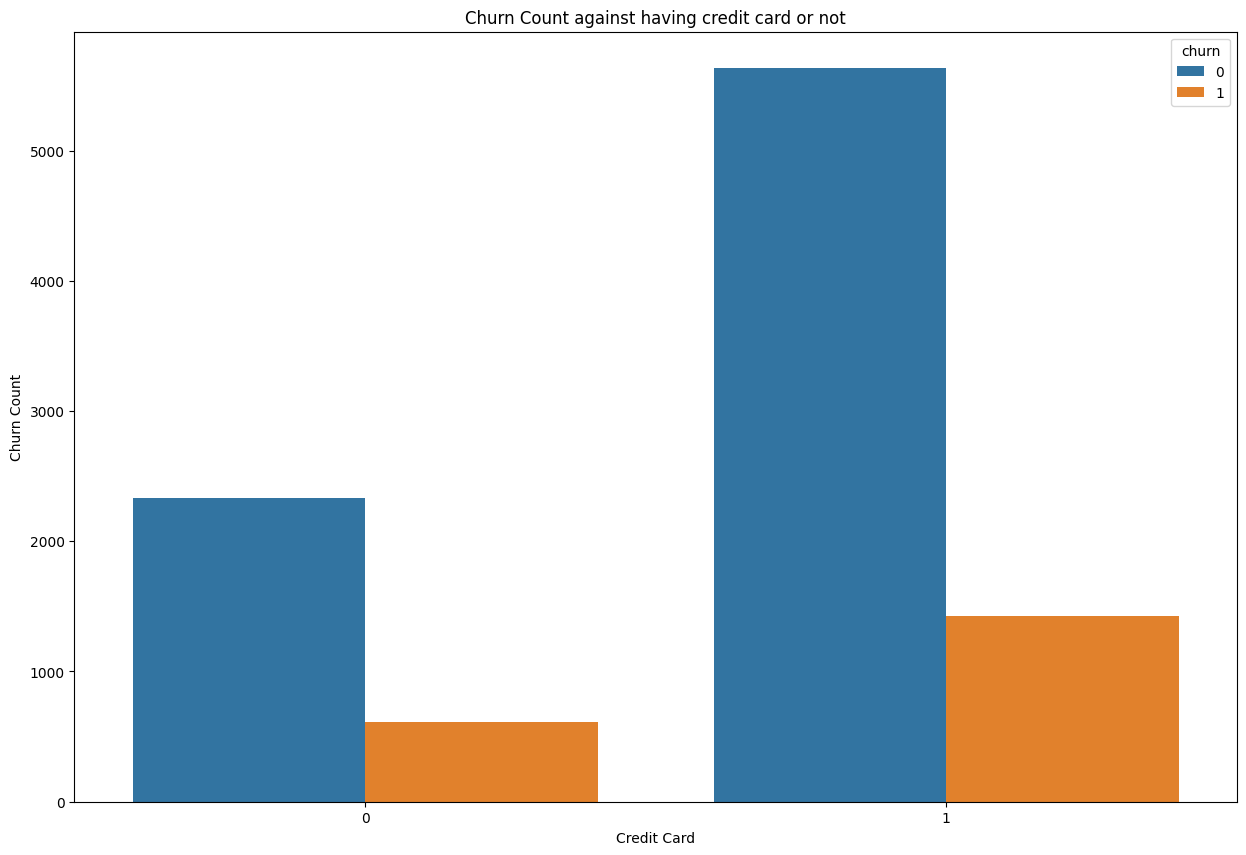

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(df, x='credit_card', hue='churn')
plt.xlabel('Credit Card')
plt.ylabel('Churn Count')
plt.title('Churn Count against having credit card or not')
plt.show()

Observation:
While the majority of customers hold a credit card, the churn rate is noticeably higher among non–credit card holders. This indicates that customers without credit cards are more likely to discontinue the service, despite being a smaller segment of the overall customer base. This trend may highlight the importance of credit card ownership as a potential indicator of customer loyalty or engagement.


**##Machine Learning Analysis**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [16]:


df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.head()
        

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Training and Testing data **

In [18]:
x=df.drop(columns=['churn'])
x.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10


In [19]:
y=df['churn']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)
x_train

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9254,15601116,686,0,1,32,6,0.00,2,1,1,179093.26
1561,15766374,632,1,1,42,4,119624.60,2,1,1,195978.86
1670,15716994,559,2,1,24,3,114739.92,1,1,0,85891.02
6087,15730759,561,0,0,27,9,135637.00,1,1,0,153080.40
6669,15797900,517,0,1,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...,...
5734,15596647,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,15681075,682,0,0,58,1,0.00,1,1,1,706.50
5390,15573851,735,0,0,38,1,0.00,3,0,0,92220.12
860,15807663,667,0,1,43,8,190227.46,1,1,0,97508.04


In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)
x_train_scaled

array([[-1.24645641,  0.35649971, -0.9055496 , ...,  0.64920267,
         0.97481699,  1.36766974],
       [ 1.05381124, -0.20389777,  0.30164867, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [ 0.3664786 , -0.96147213,  1.50884694, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [-1.6259648 ,  0.86500853, -0.9055496 , ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 1.62852321,  0.15932282, -0.9055496 , ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.21718071,  0.47065475,  0.30164867, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(x_train_scaled, y_train)



LogisticRegression()

In [23]:
y_pred=model.predict(x_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: churn, Length: 2000, dtype: int64

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.61      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.77      2000



In [26]:
confusion_matrix(y_test,y_pred)

array([[1560,   47],
       [ 321,   72]])

In [27]:
accuracy=(1560+72)/(1560+47+321+72)
accuracy

0.816

#Out of all predicted not churn values,how many are actually not churn.

In [28]:
precision_1=1560/(1560+321)
precision_1

0.8293460925039873

##Out of all predicted Churn values, how many are actual churn data.

In [29]:
precision_2=72/(72+47)
precision_2

0.6050420168067226